# Exploratory Data Analysis and Pre-processing

In [2]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('food.csv', delimiter='\t')

/home/jalilm/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.005487e+06,1.005487e+06,0.0,0.0,2.775790e+05,0.0,447135.000000,447135.000000,0.0,447135.000000,...,9251.000000,285523.000000,285523.000000,3.000000,0.0,30.000000,3.000000,20.00000,37.000000,15.000000
mean,1.517979e+09,1.540009e+09,NaN,NaN,4.002864e+16,NaN,1.622796,0.027307,NaN,0.071907,...,631.833141,9.218179,8.978320,29.333333,NaN,0.069597,0.120020,4.76000,0.026241,0.046147
std,4.074422e+07,3.132881e+07,NaN,NaN,2.108940e+19,NaN,2.349812,0.164914,NaN,0.316619,...,6864.058481,8.808982,9.272269,15.011107,NaN,0.032266,0.207828,4.24145,0.027702,0.145485
min,0.000000e+00,1.333873e+09,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000,NaN,0.000000,...,0.049000,-15.000000,-15.000000,14.000000,NaN,0.008000,0.000016,0.40000,0.001350,0.006500
25%,1.489092e+09,1.525286e+09,NaN,NaN,2.800000e+01,NaN,0.000000,0.000000,NaN,0.000000,...,111.000000,2.000000,1.000000,22.000000,NaN,0.054750,0.000031,3.50000,0.006900,0.007050
50%,1.524502e+09,1.552001e+09,NaN,NaN,4.900000e+01,NaN,1.000000,0.000000,NaN,0.000000,...,335.220000,10.000000,9.000000,30.000000,NaN,0.069000,0.000045,4.00000,0.022000,0.008500
75%,1.550147e+09,1.563514e+09,NaN,NaN,1.130000e+02,NaN,2.000000,0.000000,NaN,0.000000,...,617.500000,16.000000,17.000000,37.000000,NaN,0.089000,0.180023,5.20000,0.027600,0.011000
max,1.571617e+09,1.571617e+09,NaN,NaN,1.111111e+22,NaN,38.000000,3.000000,NaN,6.000000,...,656298.600000,40.000000,40.000000,44.000000,NaN,0.130000,0.360000,21.50000,0.150000,0.572000


/home/jalilm/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


Text(0.5, 0, 'percentage')

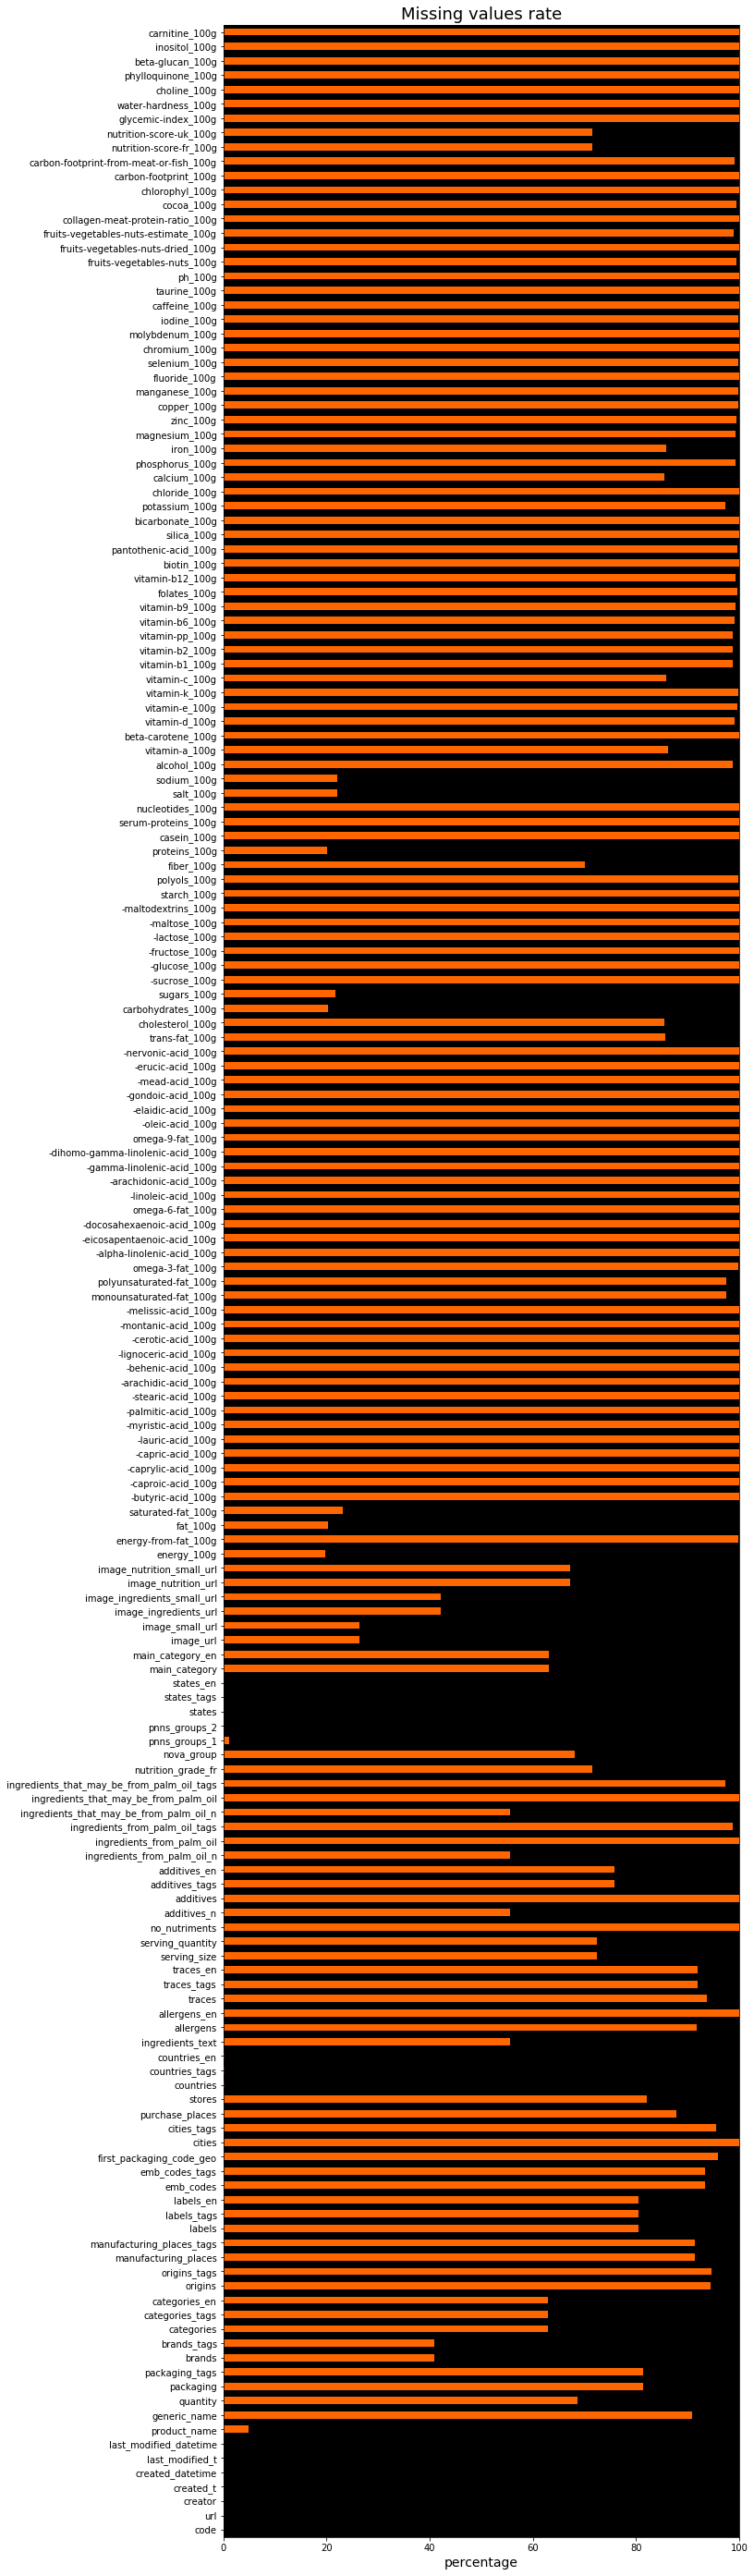

In [4]:
plt.figure(figsize=(10, 50))
plt.rcParams['axes.facecolor'] = 'black'
plt.rc('grid', color='#202020')
(df.isnull().mean(axis=0)*100).plot.barh(color ="#FF6600")
plt.xlim(xmax=100)
plt.title("Missing values rate",fontsize=18)
plt.xlabel("percentage",fontsize=14)

# Part A : Additives

In [5]:
df_new = df.additives_tags.dropna().map(lambda x : x.lower())
df_e250 = df_new.str.contains('e250')
df_nutrition = df.nutrition_grade_fr
df_both = df.iloc[df_e250.index]

In [6]:
df_both = df_both[['additives_tags', 'nutrition_grade_fr']]

In [7]:
df_both[df_both.nutrition_grade_fr.notnull()].sample(5)

,additives_tags,nutrition_grade_fr
332909,en:e300,a
21164,"en:e452,en:e452vi",a
667197,"en:e202,en:e330,en:e440",d
246076,"en:e322,en:e322i",c
787834,"en:e202,en:e950,en:e951",b


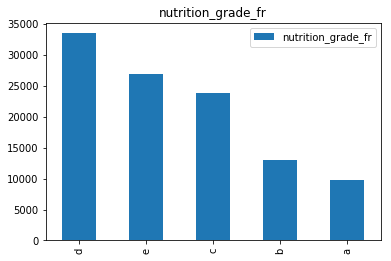

In [8]:
plt.rcParams['axes.facecolor'] = 'white'
df_result_e250 = pd.DataFrame(df_both.nutrition_grade_fr)
df_result_e250.apply(pd.value_counts).plot(kind='bar', subplots=True);

In [9]:
list_dangerous_additives = ['e951','e621', 'e133', 'e124','e110', 'e102', 'e221', 'e320', 'e220']
kwstr = '|'.join(list_dangerous_additives)
mask = df_new.to_frame().stack().str.contains(kwstr).any(level=0)
df_additives = df_new[mask]
df_all = df.iloc[df_additives.index]
df_all = df_all[['additives_tags', 'nutrition_grade_fr']]

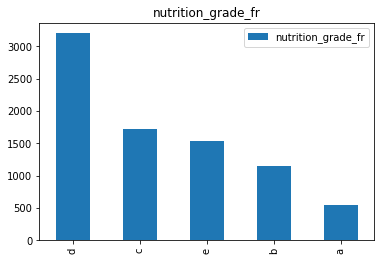

In [10]:
df_result_all = pd.DataFrame(df_all.nutrition_grade_fr)
df_result_all.apply(pd.value_counts).plot(kind='bar', subplots=True);

In [11]:
df.countries = df.countries.str.lower()

# Fix some of the names with multiple entries
df.loc[df['countries'] == 'en:fr','countries'] = 'france'
df.loc[df['countries'] == 'en:es','countries'] = 'spain'
df.loc[df['countries'] == 'en:gb','countries'] ='united kingdom'
df.loc[df['countries'] == 'en:uk','countries'] ='united kingdom'
df.loc[df['countries'] == 'españa','countries'] ='spain'
df.loc[df['countries'] == 'us','countries'] = 'united states'
df.loc[df['countries'] == 'en:us','countries'] ='united states'
df.loc[df['countries'] == 'usa','countries'] = 'united states'
df.loc[df['countries'] == 'en:cn','countries'] = 'canada'
df.loc[df['countries'] == 'en:au','countries'] = 'australia'
df.loc[df['countries'] == 'en:de','countries'] ='germany'
df.loc[df['countries'] == 'deutschland','countries'] ='germany'

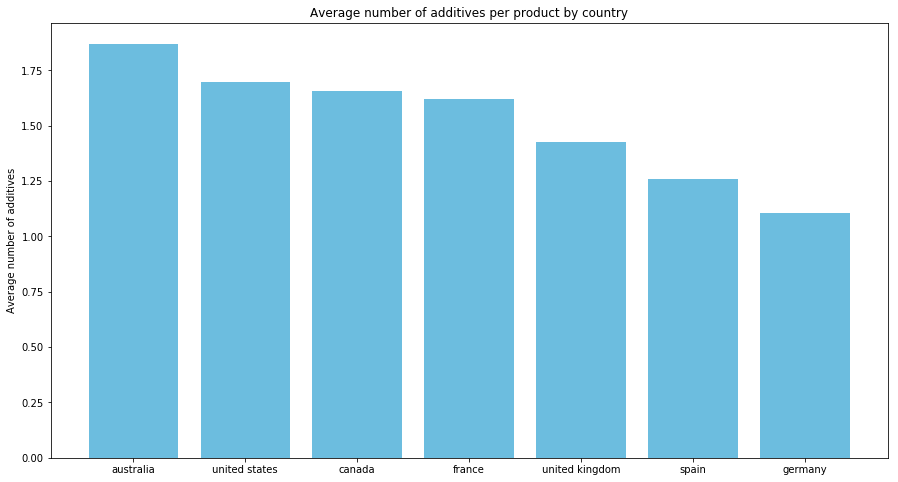

In [12]:
countries = ['france','united kingdom','spain','germany','united states','australia','canada']
df_countries = df[df.countries.isin(countries)]
df_countries = df_countries[df_countries.additives_n.notnull()]
df_groupedby_countries = df_countries.groupby(['countries']).mean().additives_n.reset_index()

np_countries = np.array(df_groupedby_countries)
np_countries = np_countries[np_countries[:,1].argsort()[::-1]]

# Plot the average number of additives per country
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
y_pos = np.arange(len(np_countries[:,0]))
x_pos = np_countries[:,1]
x_ticks = np_countries[:,0]

# Make a barplot
plt.bar(y_pos, x_pos, align='center', color='#6cbddf')
plt.title('Average number of additives per product by country')
plt.xticks(y_pos, x_ticks)
plt.ylabel('Average number of additives') 
plt.show()

Text(0, 0.5, 'Number of additives')

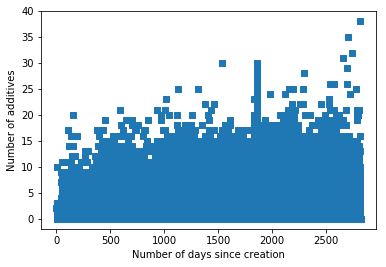

In [10]:
#from datetime import datetime

#df["datetime"] = df["created_datetime"].apply(str).apply(lambda x: x[:x.find("T")])
#min_date = datetime.strptime(df["datetime"].min(), "%Y-%m-%d")

#def apply_func(x):
#    try:
#        return (datetime.strptime(x, "%Y-%m-%d") - min_date).days
#    except:
#        return None
#df["number_days"] = df["datetime"].apply(apply_func)

#plt.scatter(df["number_days"], df["additives_n"], marker=',')
#plt.xlabel("Number of days since creation")
#plt.ylabel("Number of additives")

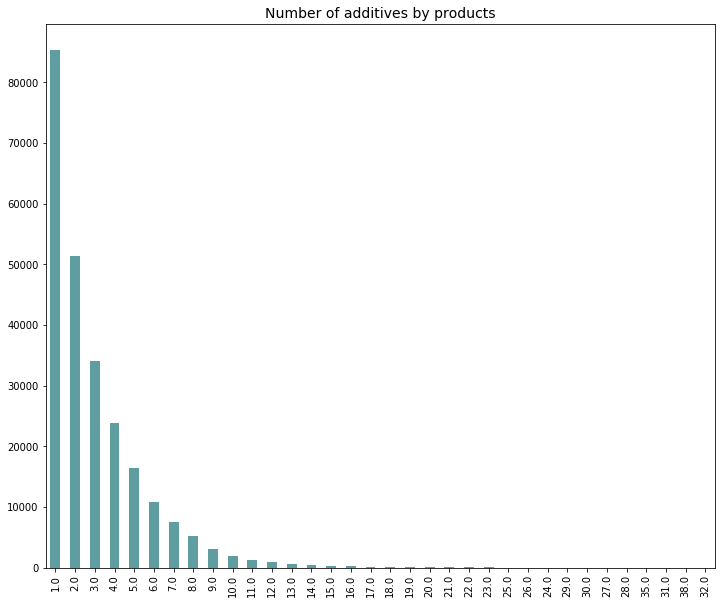

In [19]:
plt.figure(figsize=(12,10))
df[df['additives_n'] > 0.0]['additives_n'].value_counts().plot(kind='bar',color='cadetblue')
plt.title('Number of additives by products',fontsize=14)
plt.show()

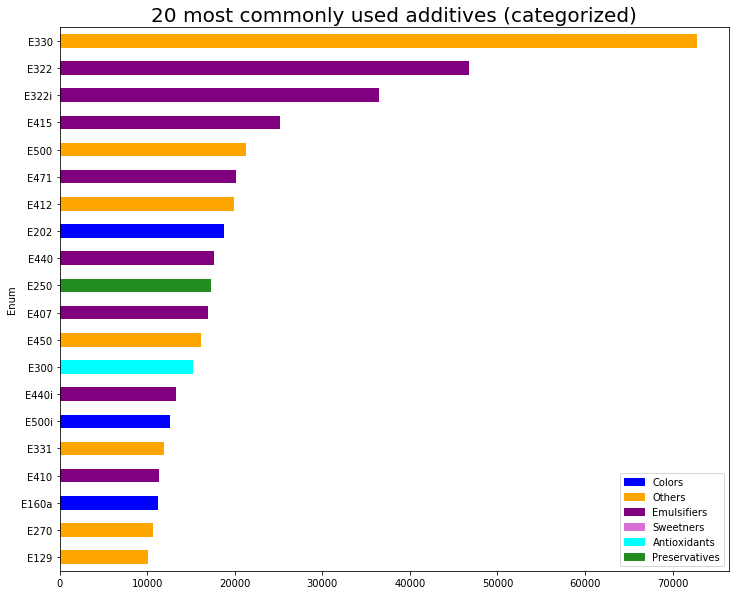

In [15]:
import matplotlib.patches as mpatches

additives = (df['additives_en'].str.extractall("(?P<Count>[E]\d\d\d\w?)"))
additives_count = additives.apply(pd.value_counts).head(20)
additives_count['Enum'] = additives_count.index
additives_count.reset_index(drop=True,inplace=True)


additives_mapping = {'E330': 'orange','E322':'purple','E322i':'purple','E101':'blue','E375':'orange','E101i':'blue',
                    'E300':'cyan','E415':'purple','E412':'orange','E500':'orange','E471':'purple','E203':'forestgreen','E407':'purple',
                    'E440':'purple','E250':'forestgreen','E150a':'blue','E450':'orange','E500i':'blue','E331':'orange',
                     'E129':'orange','E339':'orange','E440i':'purple','E160a':'blue','E270':'orange','E102':'blue',
                     'E410':'purple','E133':'blue','E341':'orange','E428':'purple','E621':'orange','E202':'blue'}

additives_count['Colors'] = additives_count['Enum'].map(additives_mapping)

ax = additives_count.plot(x='Enum',y='Count',kind='barh',color=additives_count['Colors'],figsize=(12,10))
ax.invert_yaxis()
ax.legend().set_visible(False)
ax.set_title('20 most commonly used additives (categorized)',{'fontsize':20})

colors = mpatches.Patch(color='blue', label='Colors')
others = mpatches.Patch(color='orange', label='Others')
emulsifiers = mpatches.Patch(color='purple', label='Emulsifiers')
sweetners = mpatches.Patch(color='orchid', label='Sweetners')
antioxidant = mpatches.Patch(color='cyan', label='Antioxidants')
preservatives = mpatches.Patch(color='forestgreen', label='Preservatives')

plt.legend(handles=[colors,others,emulsifiers,sweetners,antioxidant,preservatives])
plt.show()

# Part B : Allergens (United States of America)

In [13]:
with open('ingredients_allergens.pkl', 'rb') as pickle_file:
    df_allergens = pickle.load(pickle_file)

In [14]:
print(df_allergens.shape)
df_allergens.sample(5)

(81988, 3)


,product_name,ingredients_text,allergens
877830,Gressins nature,"farine de BLÉ tendre type &quot;00&quot; 50%, ...","BLÉ, MALT, GLUTEN, ARACHIDES, SOJA, LAIT"
387551,Vanille façon crème brûlée,"@CRÈME A MORCEAUX DF SUCRE CRÈME GLACÉE (45,2%...",protéines de lait
468813,Poulet sauce Champignons et Torti de maïs,"Spécialités céréalières précuites 39% [eau, sp...",en:milk
331855,Sardines marinade citron & basilic,"_Sardines_ (80 %), eau, vinaigre d'alcool, suc...",Sardines
542386,Muesli croustillant aux fruits bio,"Flocons d'avoine* 29 %, sucre de canne*, noix ...","en:gluten,en:nuts"


In [21]:
us = ['united states']
df_us = df[df.countries.isin(us)]
df_us.sample(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
200123,758669678985,http://world-en.openfoodfacts.org/product/0758...,usda-ndb-import,1489061292,2017-03-09T12:08:12Z,1489061292,2017-03-09T12:08:12Z,Sugar-Free Sweet Italian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213839,819944013058,http://world-en.openfoodfacts.org/product/0819...,usda-ndb-import,1489096651,2017-03-09T21:57:31Z,1489096652,2017-03-09T21:57:32Z,Amaranth Bar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227128,0857529006187,http://world-en.openfoodfacts.org/product/0857...,usda-ndb-import,1489073100,2017-03-09T15:25:00Z,1489073100,2017-03-09T15:25:00Z,"Vibrant Probiotic, Organic Fruit Juice Drink W...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88672,70650005700,http://world-en.openfoodfacts.org/product/0070...,usda-ndb-import,1489057027,2017-03-09T10:57:07Z,1489057027,2017-03-09T10:57:07Z,"Zotz, Fizzz, Power Candy, Cherry, Grape, Water...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45035,0041000022548,http://world-en.openfoodfacts.org/product/0041...,usda-ndb-import,1489064391,2017-03-09T12:59:51Z,1489064394,2017-03-09T12:59:54Z,Fettuccini In A Sour Cream Flavored & Mushroom...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Part C : Palm Oil

In [33]:
df_palmoil = df.ingredients_from_palm_oil_tags.dropna()

295                        huile-de-palme
548                        huile-de-palme
1327                       huile-de-palme
1375                       huile-de-palme
1376                       huile-de-palme
1424                       huile-de-palme
1496                       huile-de-palme
1556                       huile-de-palme
1623                       huile-de-palme
2095                       huile-de-palme
2098                       huile-de-palme
2110                       huile-de-palme
2517                       huile-de-palme
2658                       huile-de-palme
2663                       huile-de-palme
2708                       huile-de-palme
2751                       huile-de-palme
2892                       huile-de-palme
3069                       huile-de-palme
8152                       huile-de-palme
11608                      huile-de-palme
12205                      huile-de-palme
12263                      huile-de-palme
13223                      huile-d

In [ ]:
df[]